

<h1 style='text-align: CENTER;'> Predicting Diabetes Risk with k-Nearest Neighbors (k-NN)

### Objective: 
Develop a model using k-nearest neighbors (k-NN) algorithm to predict the risk
of diabetes in patients based on their health metrics and demographic information, with the
aim of early detection and intervention to improve patient outcomes.

### Data Set: Diabetes data set
### Data Source:Kaggle

## Procedure
Step 1: Data Acquisition and Pre-processing (data_prep.py):<br>

Load patient health data and diabetes diagnosis data from various sources.
Clean and preprocess the data to handle outliers and missing values.
Encode categorical variables such as gender and family history of diabetes.

Step 2: Exploratory Data Analysis (eda.py):<br>
Visualize the distribution of diabetes risk levels to understand the prevalence of diabetes in the dataset.
Analyze correlations between health indicators (e.g., blood glucose levels, BMI) and diabetes risk.
Identify patterns and trends in patient data to gain insights into potential risk factors for diabetes.<br>

Step 3: Feature Engineering (feature_eng.py):<br>
Create new features that may provide additional information for predicting diabetes risk (e.g., categorizing BMI or blood glucose levels).<br>
Select relevant features for modeling using techniques like feature importance analysis or domain knowledge.<br>

Step 4: Model Building and Evaluation (modeling.py):<br>
Split the data into training and testing sets to train and evaluate the model.<br>
Choose an appropriate machine learning algorithm (e.g., k-NN) for predicting diabetes risk based on health indicators.<br>
Train the k-NN model on the training data.<br>
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.<br>
Perform hyperparameter tuning to optimize the model's performance, adjusting parameters such as the number of neighbors in the k-NN algorithm.<br>

Step 5: Personalized Intervention Strategies:<br>
Use the trained model to predict the risk of diabetes for patients.<br>
Identify high-risk patients based on the model's predictions.<br>
Develop personalized intervention strategies for high-risk patients, including lifestyle modifications, dietary changes, and regular health monitoring.<br>
Continuously update and refine intervention strategies based on patient feedback and additional data.<br>

Step 6: Gain Insights:<br>
Reflect on the findings from the exploratory data analysis and model evaluation to gain insights into the relationship between health metrics and diabetes risk.<br>

Identify key risk factors contributing to diabetes based on feature importance analysis and correlation analysis.<br>
Use these insights to inform future research, healthcare policies, and interventions aimed at preventing and managing diabetes.<br>

## Methodology
1.Data Acquisition and Pre-processing:<br>
In this initial stage, the data is acquired from various sources including patient health records, demographic databases, and historical diabetes diagnosis data. The data undergoes preprocessing steps to ensure its quality and suitability for analysis.<br>

Functions:<br>

Data Collection: Gather patient health data including blood glucose levels, BMI, blood pressure, etc., along with demographic information such as age, gender, and family history of diabetes.<br>
Data Cleaning: Remove any inconsistencies, handle missing values, and address outliers in the dataset.<br>
Feature Encoding: Encode categorical variables such as gender and family history of diabetes using techniques like one-hot encoding or label encoding<br>

2.Exploratory Data Analysis(EDA):<br>
Exploratory Data Analysis (EDA) is conducted to gain insights into the characteristics of the dataset and uncover potential patterns or relationships between variables.<br>

Functions:<br>

Data Visualization: Visualize the distribution of diabetes risk levels and explore relationships between features using techniques such as histograms, scatter plots, and correlation matrices.
Statistical Analysis: Conduct statistical tests to identify significant associations between variables and diabetes risk.<br>

3.Feature Engineering:<br>
Feature Engineering involves creating new features or transforming existing ones to enhance the predictive power of the model.<br>

Functions:<br>

Feature Creation: Generate new features based on domain knowledge or insights gained from EDA, such as BMI categories or blood glucose level categories.<br>
Feature Selection: Identify the most relevant features using techniques like feature importance analysis or dimensionality reduction methods.<br>

4.Model Building and Evaluation:<br>
In this stage, a k-Nearest Neighbors (k-NN) classification model is trained to predict the risk of diabetes for patients based on their health indicators.

Functions:<br>

Data Splitting: Split the dataset into training and testing sets to train and evaluate the model.
Model Training: Fit the k-NN model to the training data and tune hyperparameters to optimize performance.
Model Evaluation: Assess the performance of the trained model using various metrics including accuracy, precision, recall, and F1-score.<br>
Equations:<br>

$$Accuracy
=
(TP
+
TN)/
Total Instances
$$<br>
$$Precision
=
TP/
(TP
+
FP)
$$<br>
$$Recall (Sensitivity): 
Recall
=
TP/
(TP
+
FN)
$$<br>
$$Specificity: 
Specificity
=
TN/
(TN
+
FP)
$$





### 1.Data Accquistion and Preprocessing

In [39]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [40]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes2.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [41]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Following columns or variables have an invalid zero value:<br>

1.Glucose<BR>
2.BloodPressure<BR>
3.SkinThickness<BR>
4.Insulin<BR>
5.BMI<BR>
On these columns, a value of zero does not make sense and thus indicates missing value.<BR>
<B>It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values</B>

In [43]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


<b>To fill these Nan values the data distribution needs to be understood</b>

### 2. Exploratory Data Analysis:

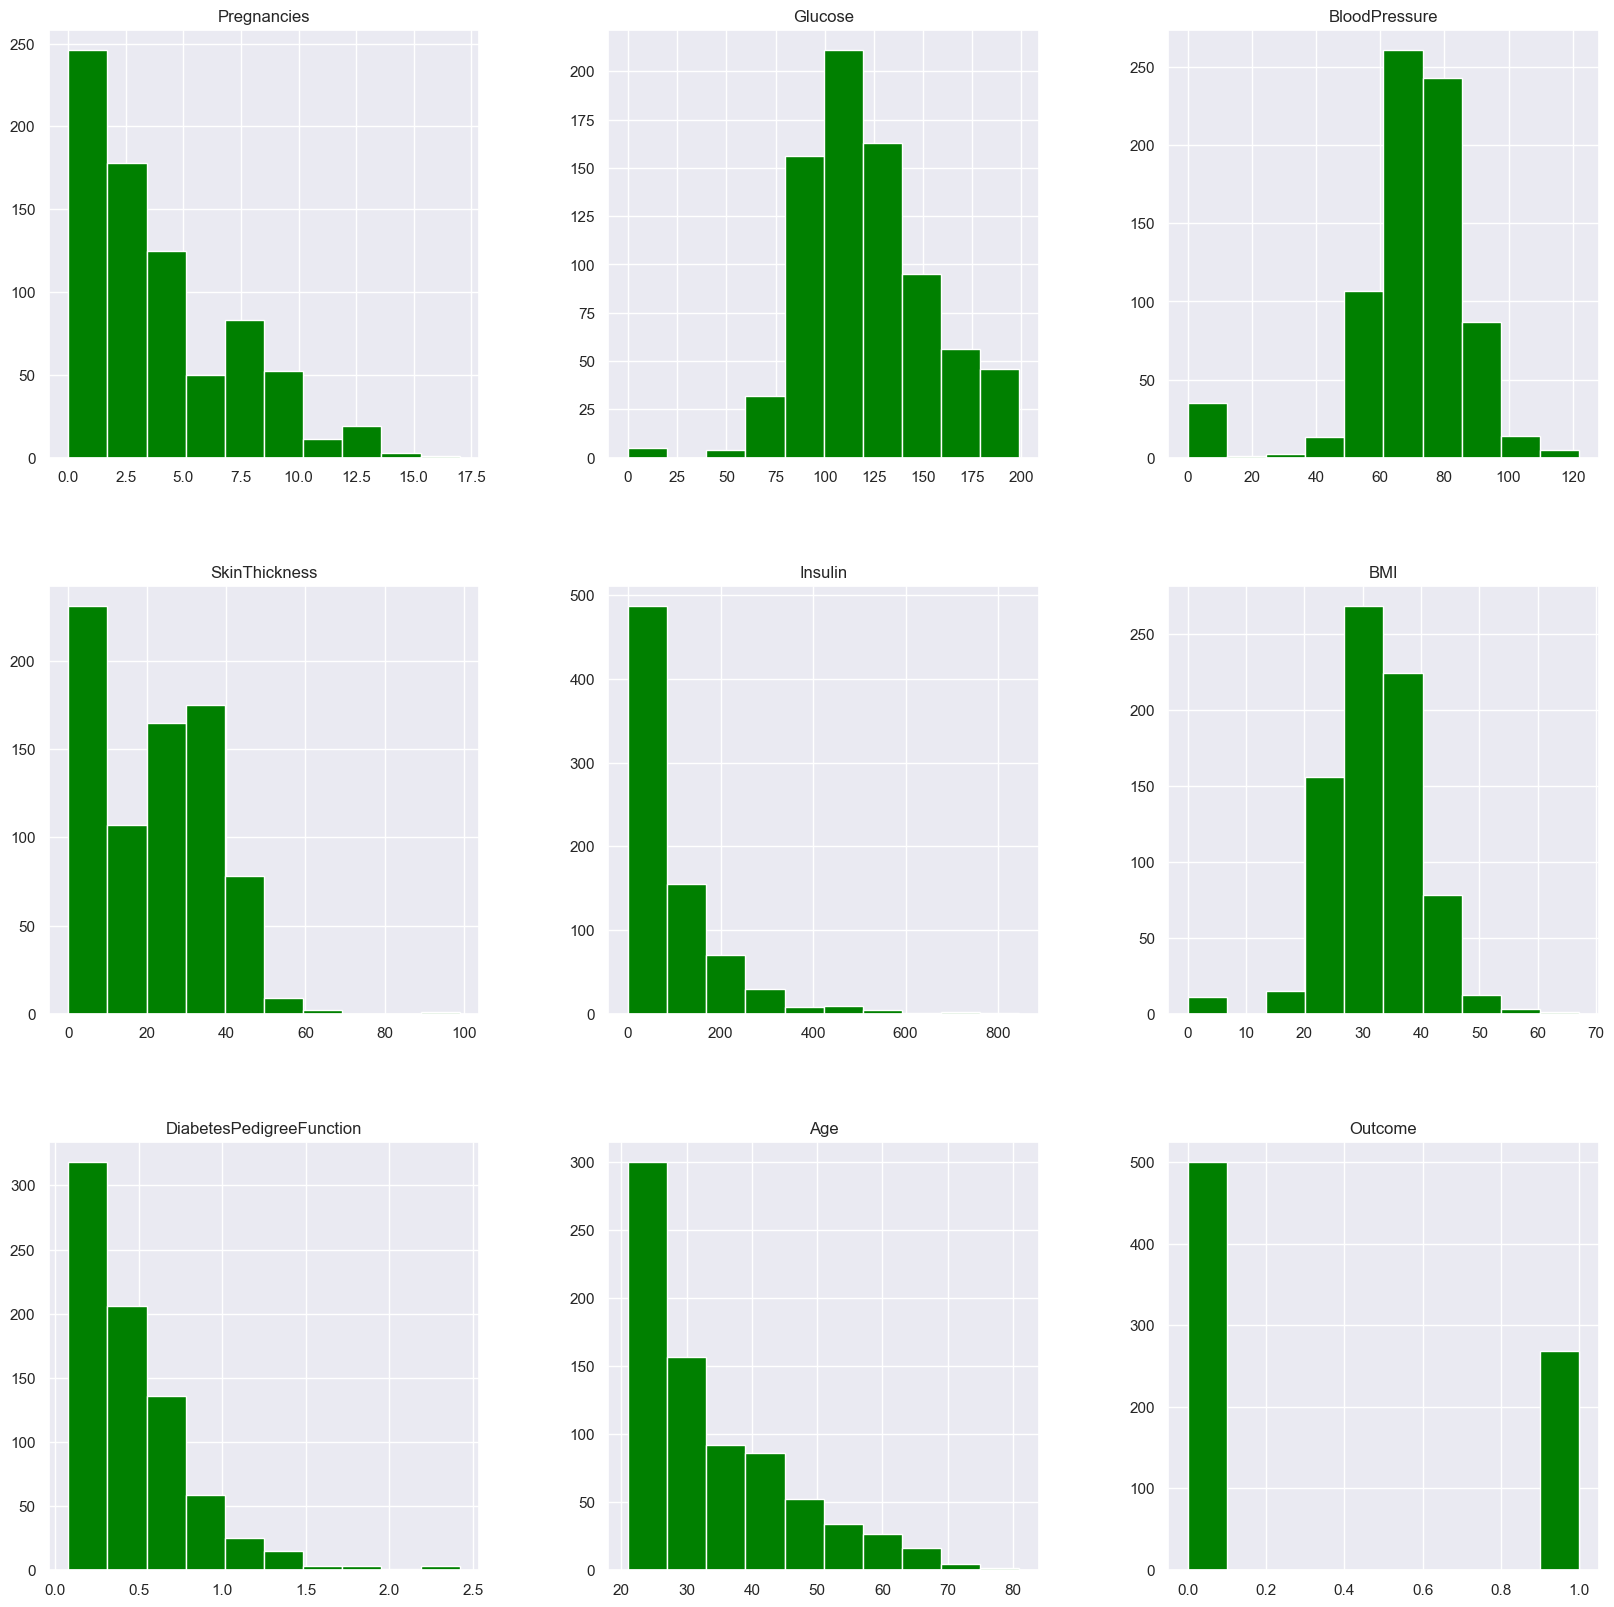

In [44]:
p = diabetes_data.hist(figsize = (20,20), color='green')

Aiming to impute nan values for the columns in accordance with their distribution

In [45]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [46]:
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Plotting after Nan removal

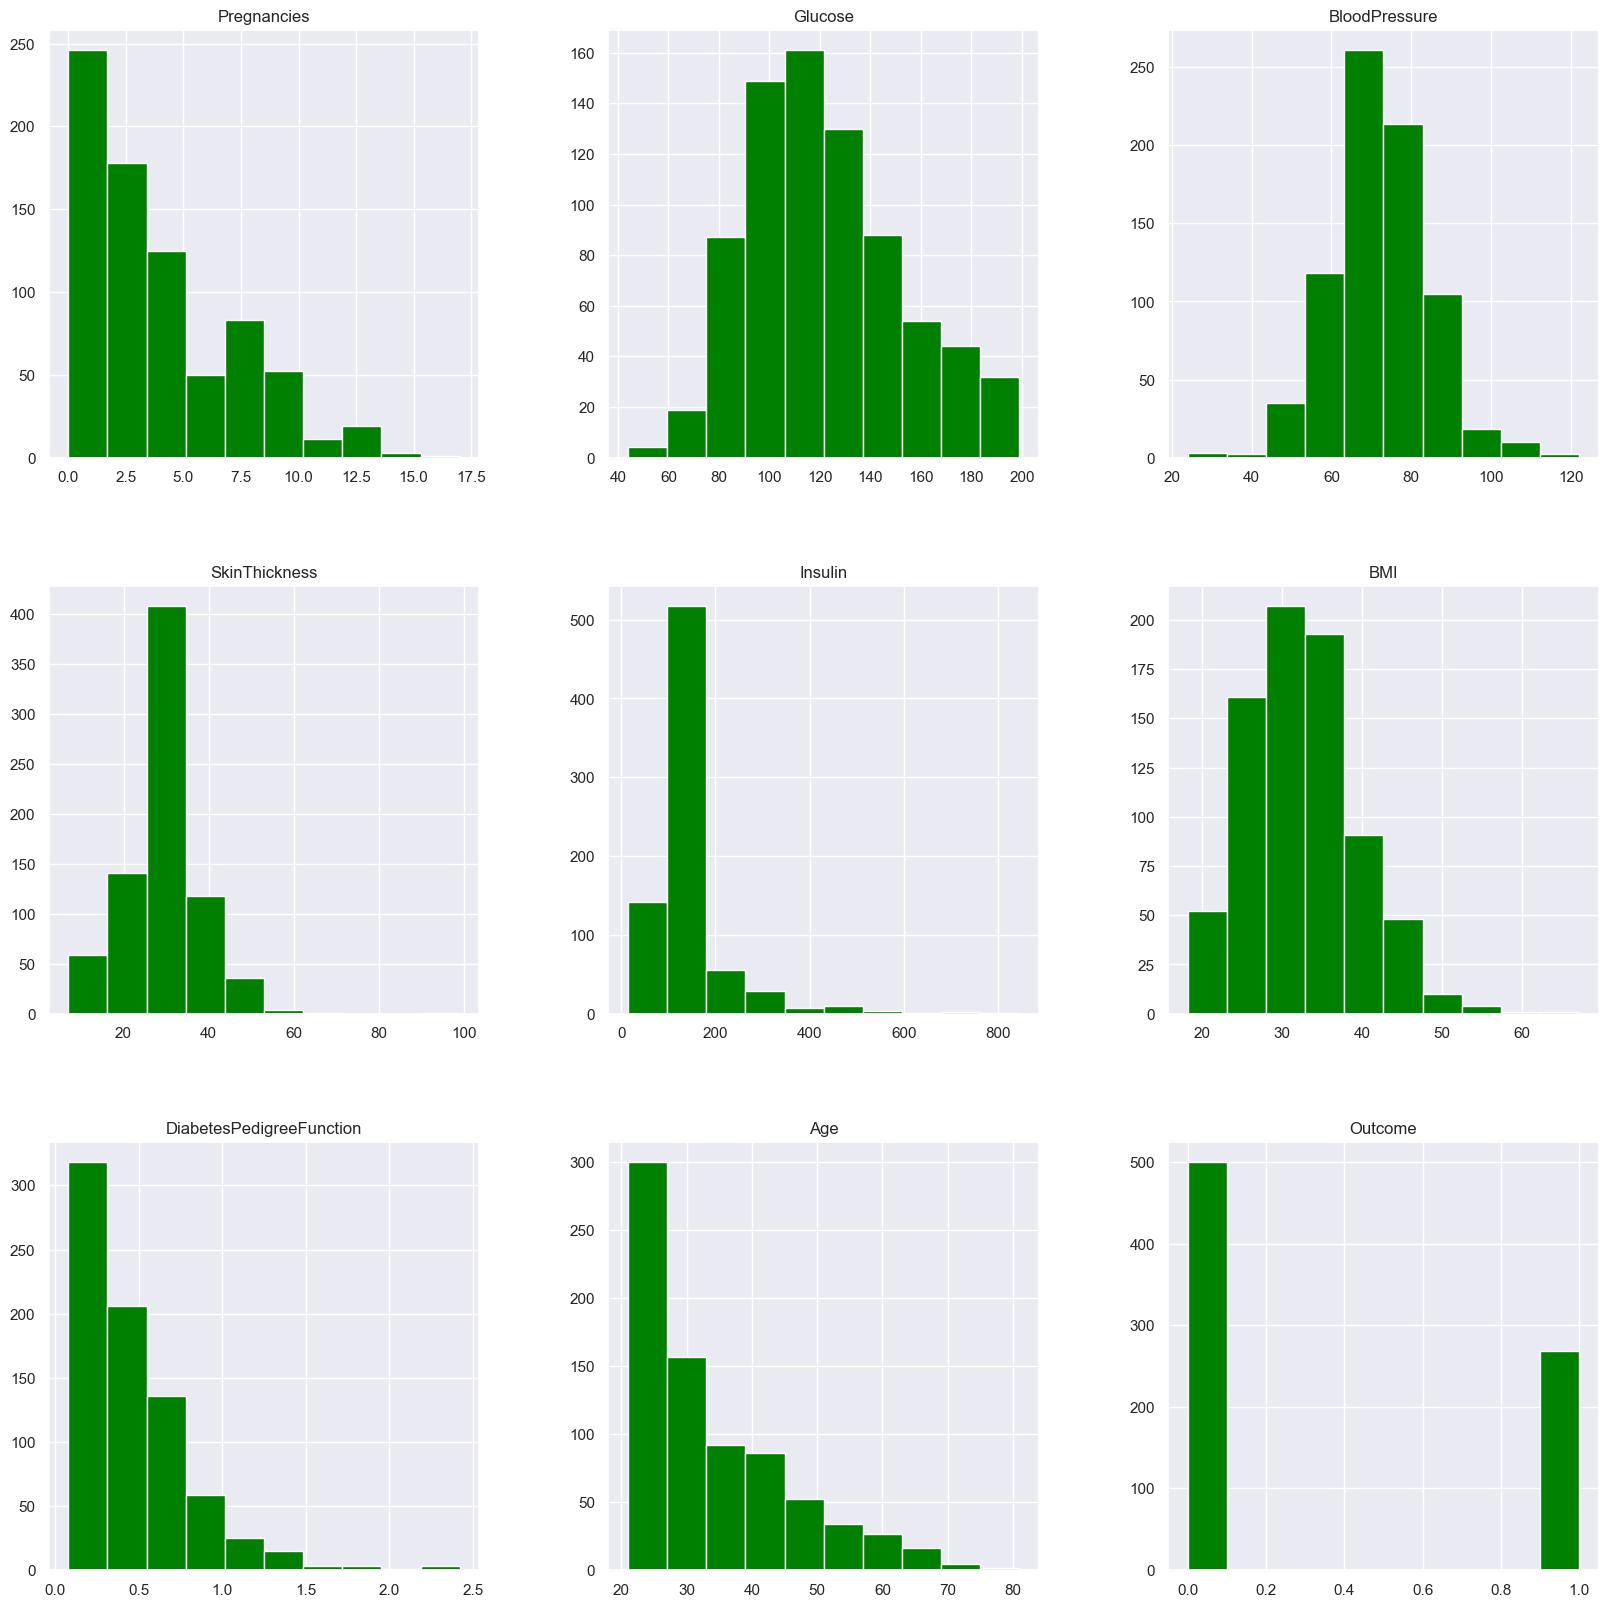

In [47]:
p = diabetes_data_copy.hist(figsize = (20,20),color="green")

In [48]:
# observing the shape of the data
diabetes_data.shape

(768, 9)

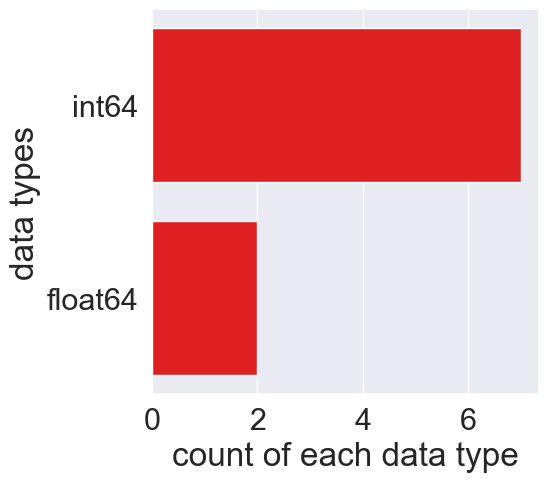

In [90]:
## data type analysis
plt.figure(figsize=(5,5))
sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data,color='red')
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


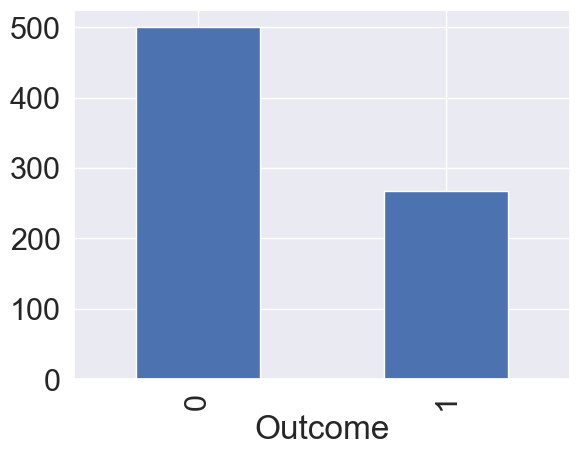

In [50]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patient

### Pair plot

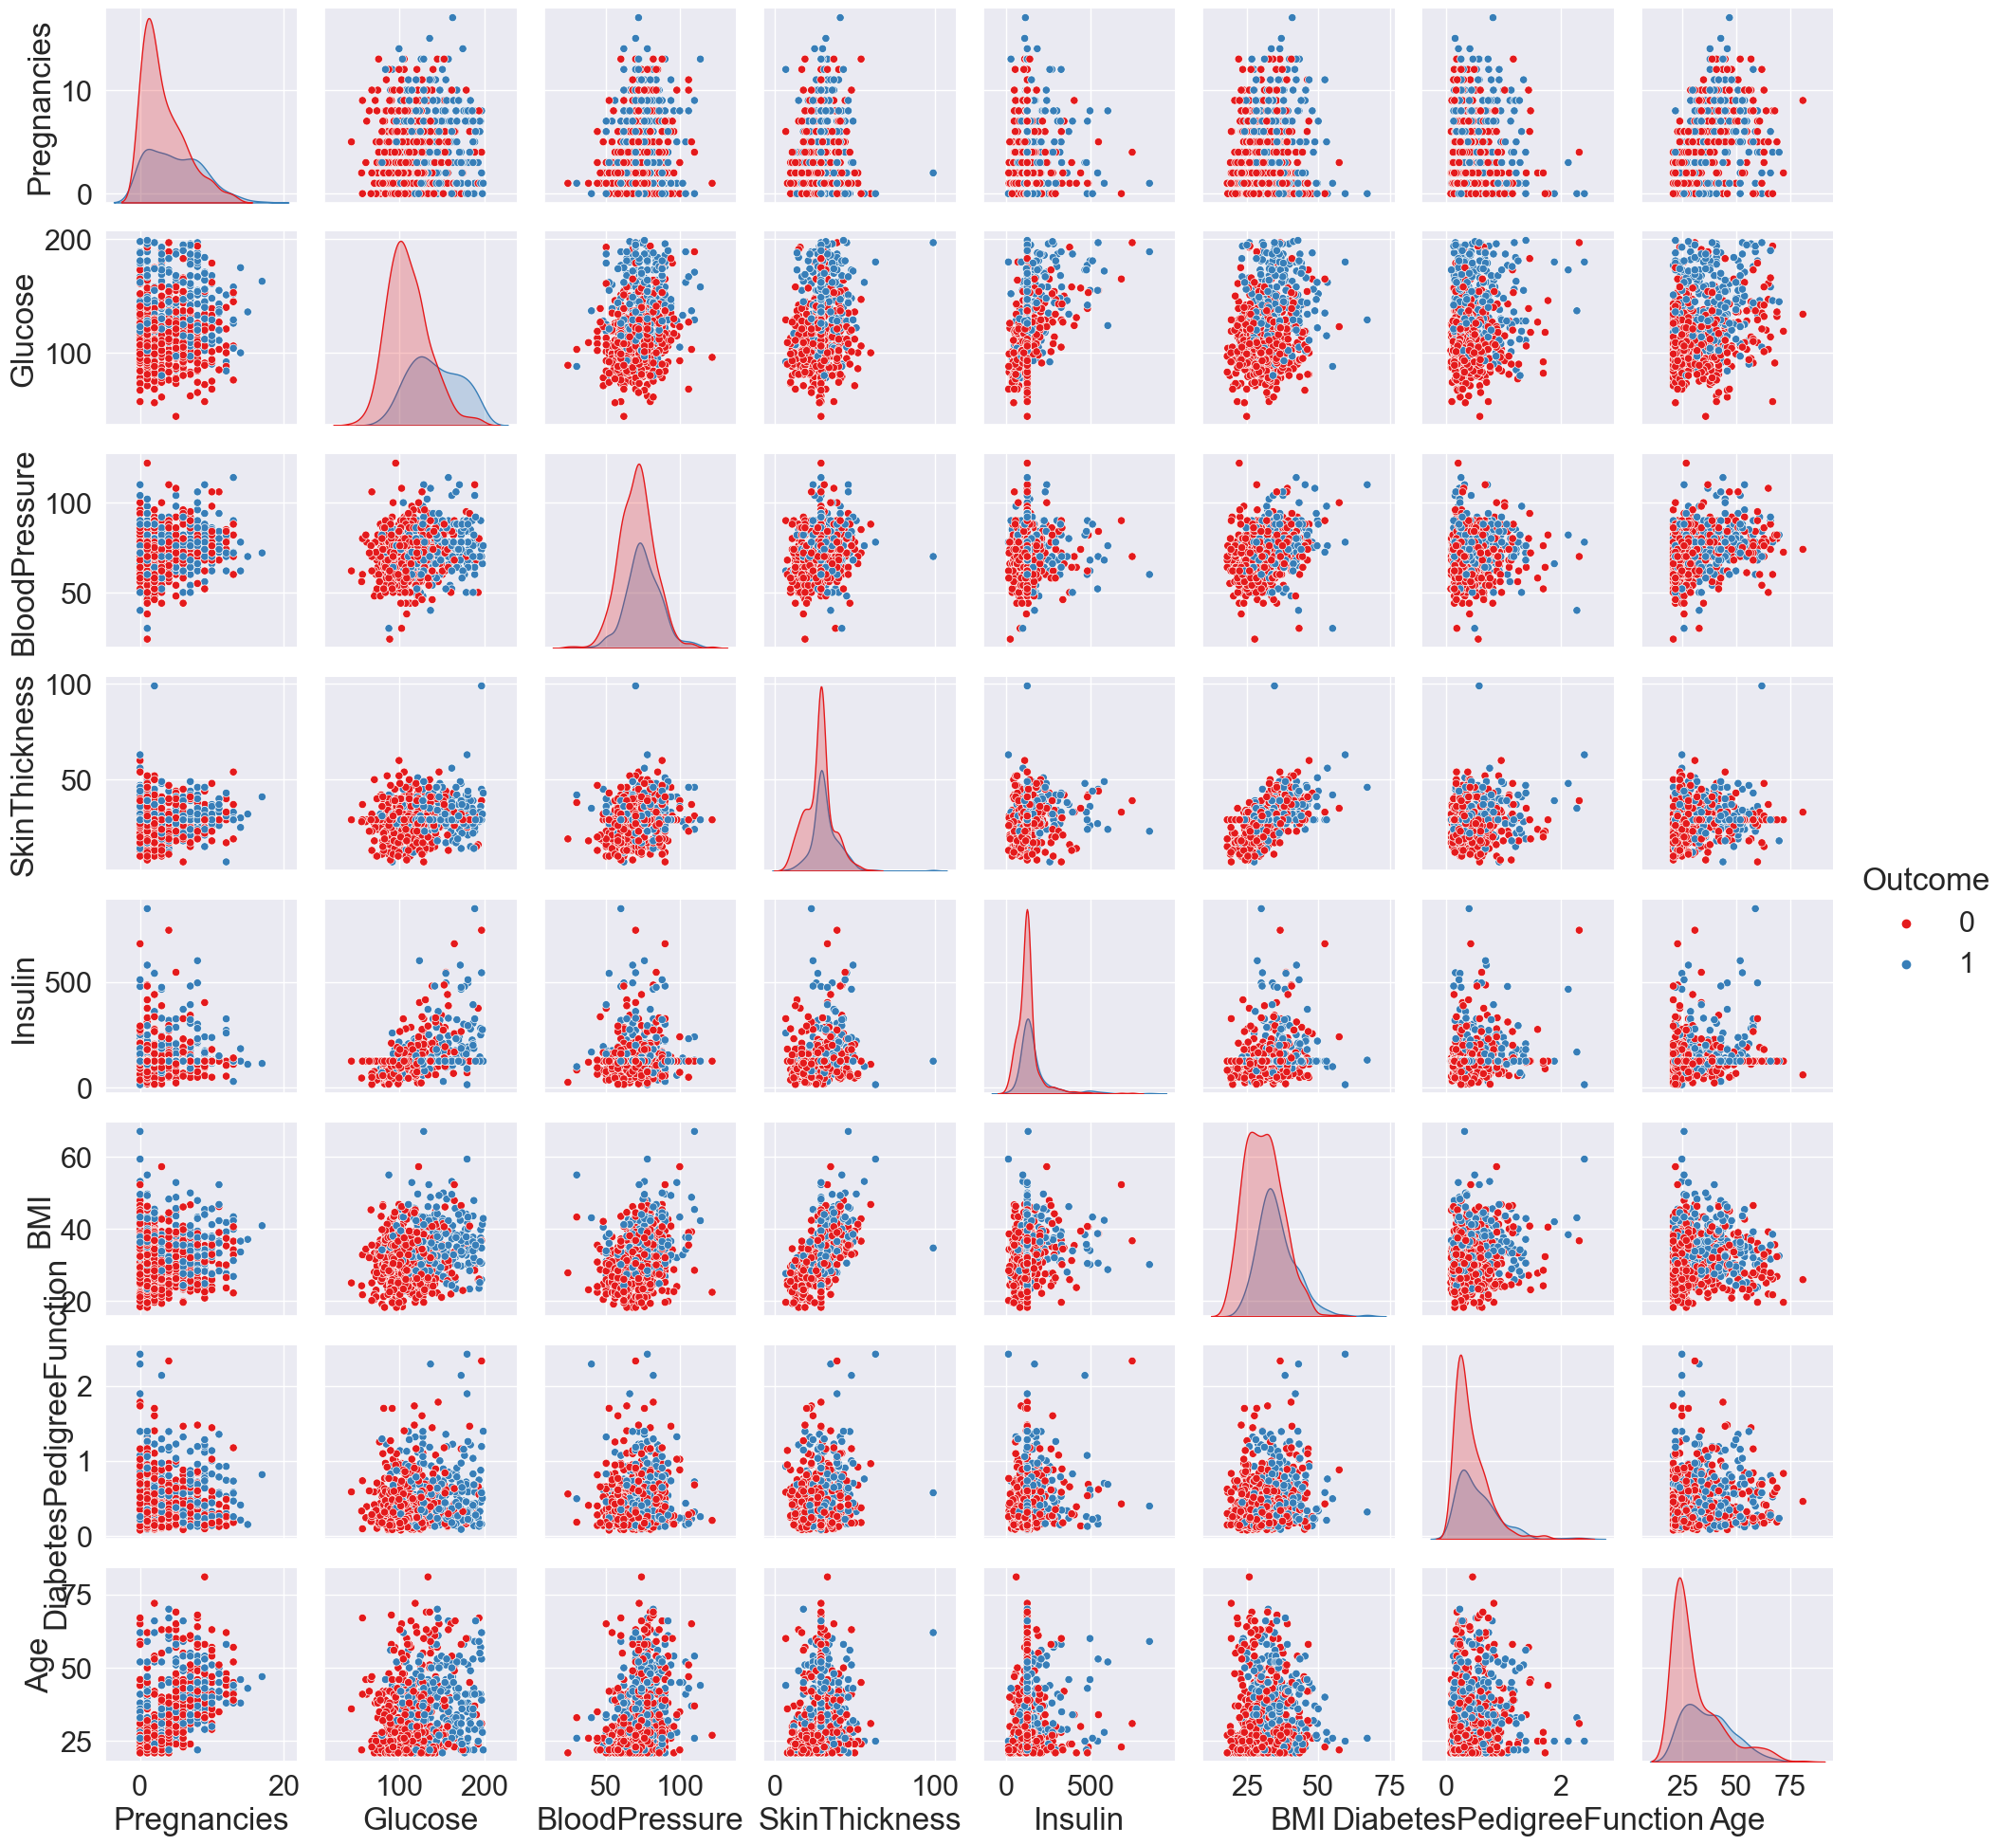

In [91]:
p = sns.pairplot(diabetes_data_copy, hue='Outcome', palette='Set1')

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

### Heat Map

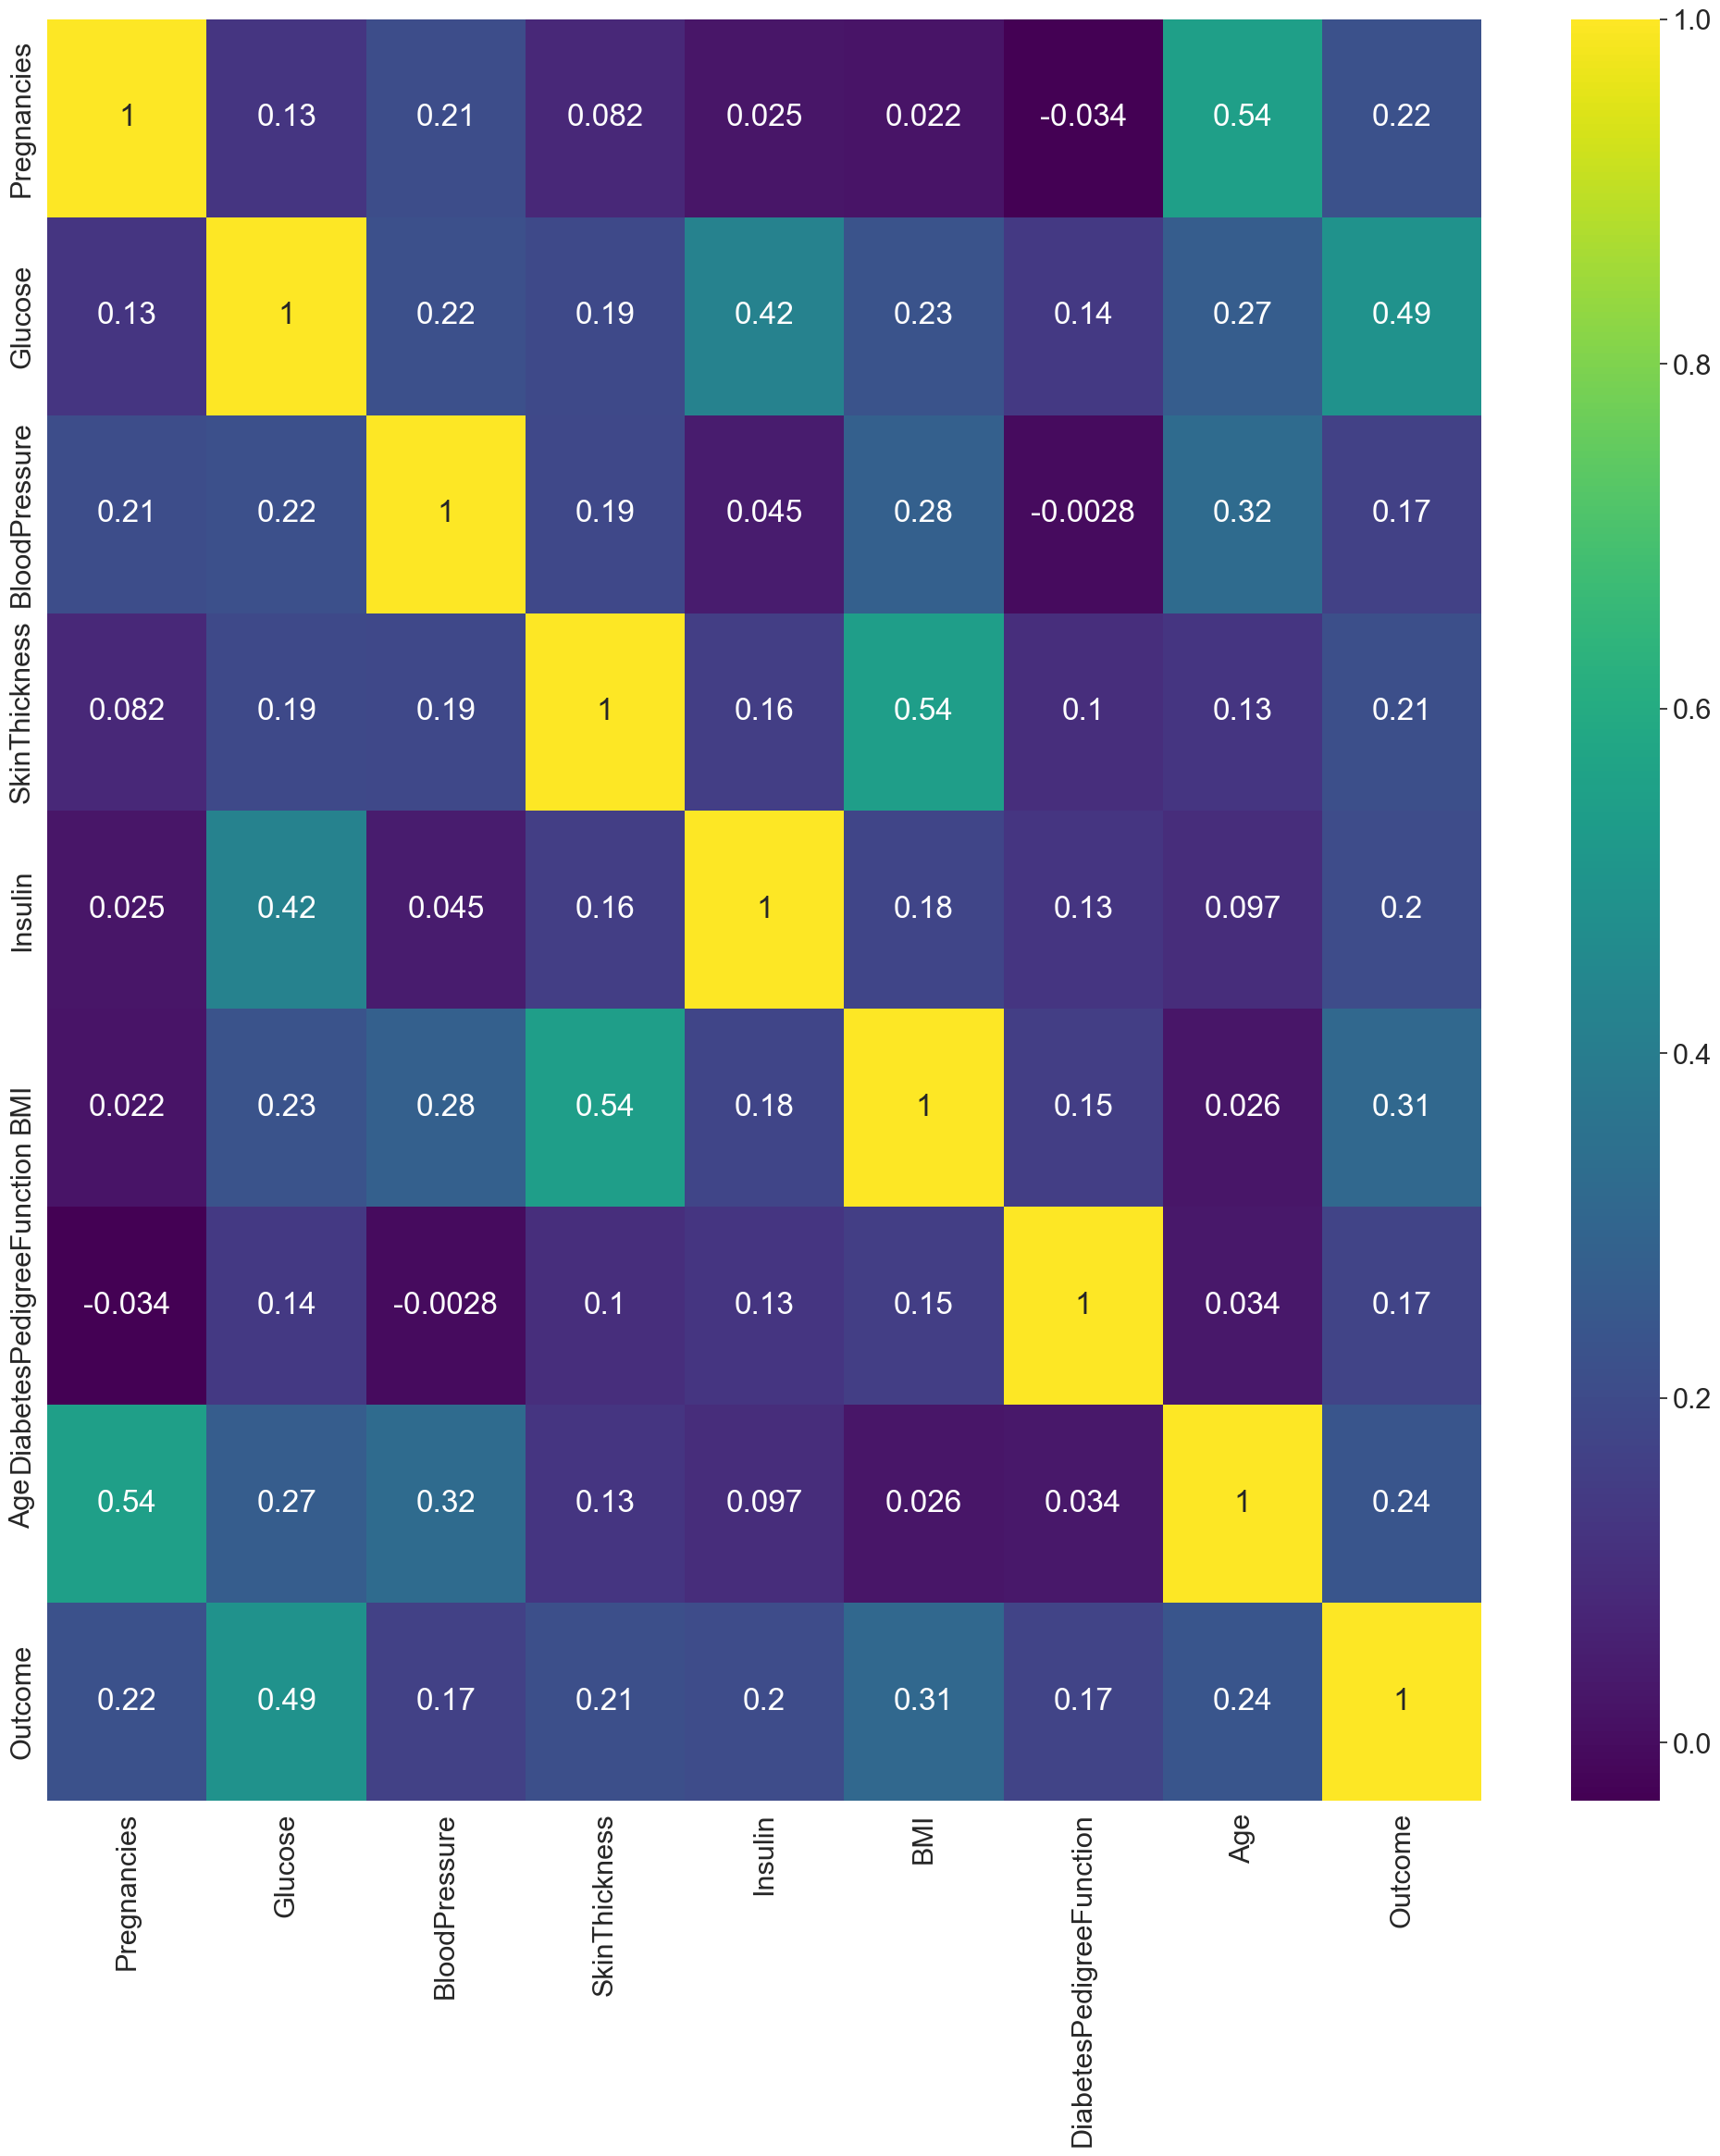

In [87]:
plt.figure(figsize=(25,25))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='viridis')  

### 3. Feature Engineering :

### Scaling the data:
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:<br>
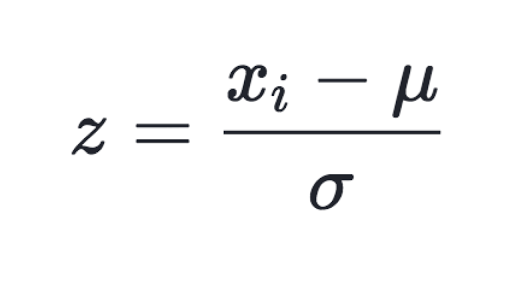

In [53]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [54]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [55]:
y = diabetes_data_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Why Scaling the data for KNN?
it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

### 4. Model Building and Evaluation:

### Test Train Split and Cross Validation methods
<b>Train Test Split :</b> To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.<br>
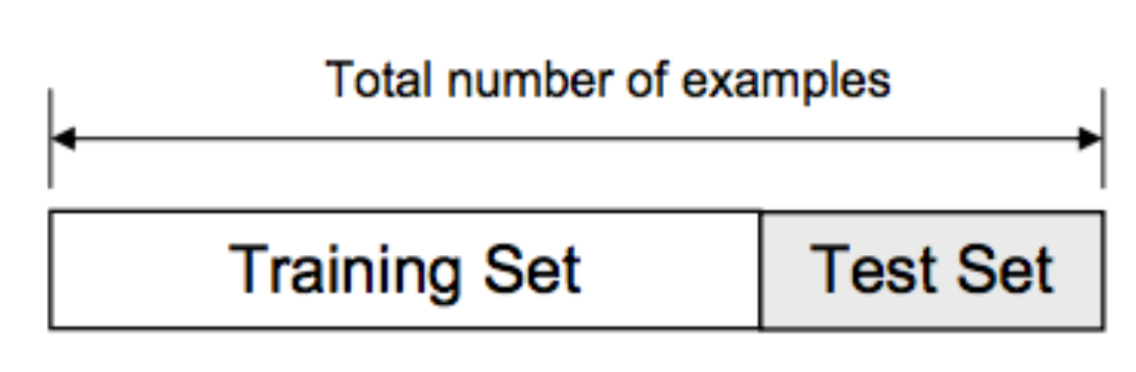


 
 

<b>Cross Validation:</b><br>
 When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques.<br>
 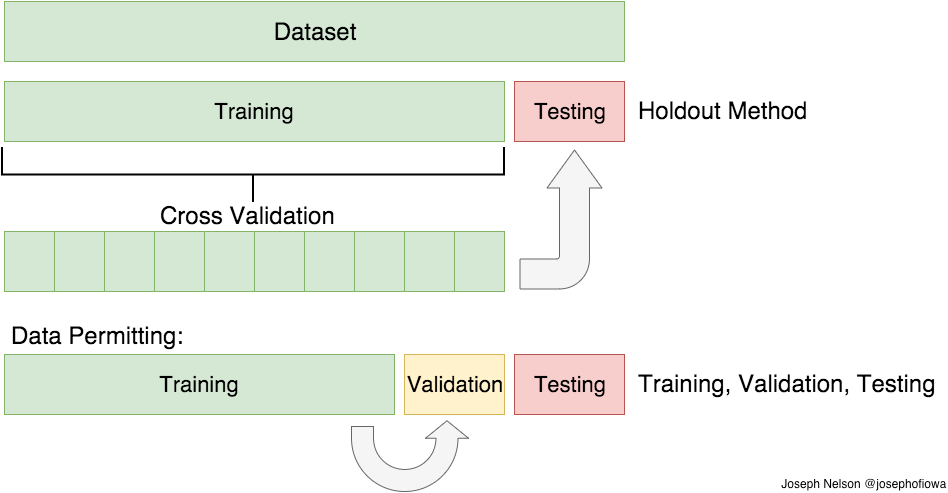

In [56]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [57]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [58]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [59]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


### Result Visualisation

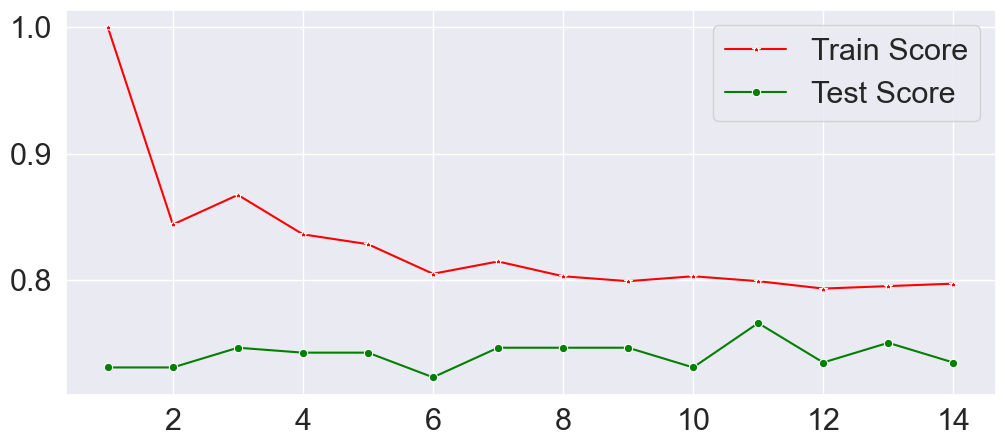

In [89]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score',color='red')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score',color='green')
plt.show()

<b>The best result is captured at k = 11 hence 11 is used for the final model

In [79]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

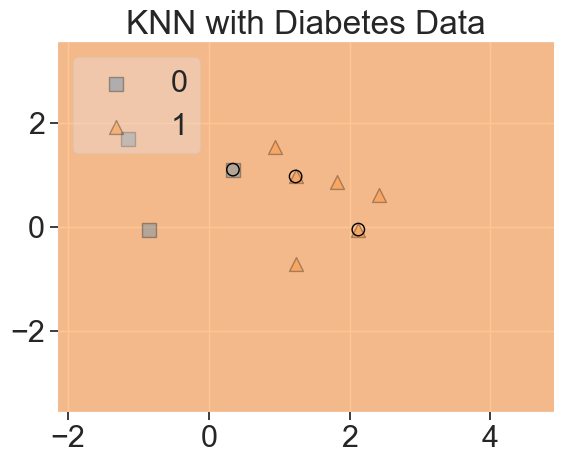

In [86]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Set up color map
cmap = plt.cm.viridis

# Define scatter plot parameters
scatter_kwargs = {'alpha': 0.3, 'c': y.values, 'marker': 'o', 's': 100, 'cmap': cmap}

# Plot decision boundary
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values, scatter_kwargs=scatter_kwargs)
plt.title('KNN with Diabetes Data')
plt.show()

### Model Performance Analysis

### Confusion Matrix
The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.<br>
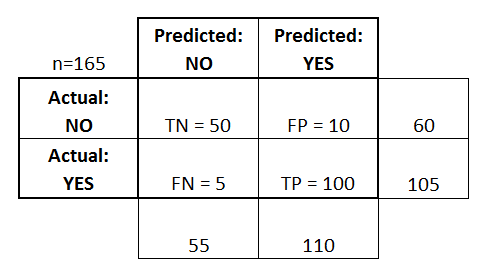

In [82]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 6.049999999999999, 'Predicted label')

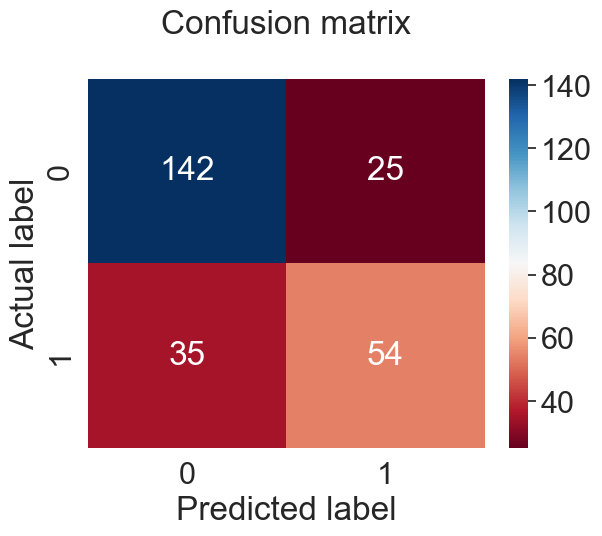

In [83]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Classification Report
Report which includes Precision, Recall and F1-Score.

<b>Precision Score</b><BR>
    TP – True Positives<BR>
    FP – False Positives<BR>

Precision – Accuracy of positive predictions.<BR>
Precision = TP/(TP + FP)<BR>


<b>Recall Score</b><BR>
    FN – False Negatives<BR>

Recall(sensitivity or true positive rate): <BR>Fraction of positives that were correctly identified.<BR>
    Recall = TP/(TP+FN)<BR>

<b>F1 Score</b><BR>
    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.<BR>
    F1 Score takes into account precision and the recall. <BR>
    It is created by finding the the harmonic mean of precision and recall.<BR>
     F1 = 2 x (precision x recall)/(precision + recall)


In [74]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



### Hyper Parameter optimization

In [75]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


## Conclusion

### Based on the confusion matrix you provided:

<b>True Negatives (TN):</b> 142 patients were correctly classified as not having diabetes.<br>
<b>False Positives (FP):</b> 25 patients were incorrectly classified as having diabetes when they actually did not.<br>
<b>False Negatives (FN):</b> 35 patients were incorrectly classified as not having diabetes when they actually did.<br>
<b>True Positives (TP):</b> 54 patients were correctly classified as having diabetes.<br>

<b>1.Accuracy:</b><br>
TP+TN/(Totalinstances)=<br>54+142/256=196/256≈<br>
<b>0.7656</b><br>
<b>2.Precision:</b><br>
TP/TP+EP =54/54+25=54/79≈0.6835<BR>
<b>3.Recall(Sensitivity):</b><br>
TP/TP+FN=54/54+35=54/89≈0.6067<Br>
<b>4.Specificity:</b><br>
TN/TN+FP=142/142+25=142/167≈0.8503<BR>
<BR>
So, the calculated metrics are:
Accuracy: Approximately <b>76.56%</b><BR>
Precision: Approximately <b>68.35%</b><BR>
Recall (Sensitivity): Approximately <b>60.67%</b><BR>
Specificity:Approximately <b>85.03% </b>   
    


### Inferences from Hyperparameter tuning<br>
1.Model Performance: The KNN model with the best parameter configuration achieves a cross-validated accuracy of approximately <b>77.2%</b>. This suggests that the model performs reasonably well in predicting diabetes based on the provided features.<br><br>
2.Optimal Number of Neighbors: The optimal number of neighbors (n_neighbors) for the KNN classifier is found to be <b>25</b>. This implies that considering 25 nearest neighbors provides the best balance between bias and variance for this dataset.

Moving forward, continuous monitoring and refinement of the predictive model, along with ongoing data collection and analysis, will be essential to further enhance its accuracy and effectiveness. Additionally, collaboration with healthcare professionals and stakeholders can facilitate the implementation of our predictive model in clinical settings, ultimately improving patient outcomes and reducing the burden of diabetes on individuals and healthcare systems.<br>

In conclusion, this project underscores the importance of leveraging data-driven approaches to predict and mitigate the risk of diabetes, ultimately contributing to better healthcare outcomes and improved quality of life for patients.